In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
file = "hasnur_seam_dataset_latest.csv"
df = pd.read_csv(file, nrows=101,skiprows=1)
df = df.drop(df.columns[7:], axis=1)
df.Year = pd.to_datetime(df.Year, format='%Y')
df.head()

,Year,February Average Temperature (Northeast),February Average Temperature (Midwest),February Average Temperature (Pennsylvania),March Average Temperature (Northeast),March Average Temperature (Midwest),March Average Temperature (Pennsylvania)
0,1895-01-01,15.6,21.9,17.0,27.6,40.2,31.3
1,1896-01-01,22.2,33.5,26.6,25.3,36.9,27.8
2,1897-01-01,23.6,34.7,27.9,32.0,44.0,36.9
3,1898-01-01,24.8,33.3,26.7,38.0,46.0,42.0
4,1899-01-01,18.1,22.2,20.0,29.3,38.4,34.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 7 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   Year                                         101 non-null    datetime64[ns]
 1   February Average Temperature (Northeast)     101 non-null    float64       
 2   February Average Temperature (Midwest)       101 non-null    float64       
 3   February Average Temperature (Pennsylvania)  101 non-null    float64       
 4   March Average Temperature (Northeast)        101 non-null    float64       
 5   March Average Temperature (Midwest)          101 non-null    float64       
 6   March Average Temperature (Pennsylvania)     101 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 5.6 KB


In [4]:
sns.set(rc={'figure.figsize':(16, 4)})

Text(0.5, 1.0, 'February Average Temperature (Northeast)')

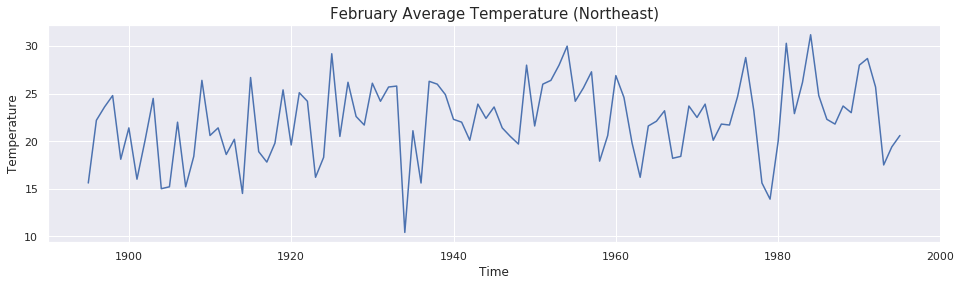

In [5]:
#As we have prepared our data set, we can start right away with assigning the variables
#The x-axis is always (exception confirms the rule) used to display the time passed.
x= df['Year']
y= df['February Average Temperature (Northeast)']
plt.plot(x,y)

#Change x/y-label
plt.xlabel('Time')
plt.ylabel('Temperature')

#Change title
plt.title('February Average Temperature (Northeast)', fontsize=(15))

Text(0.5, 1.0, 'February Average Temperature (Midwest)')

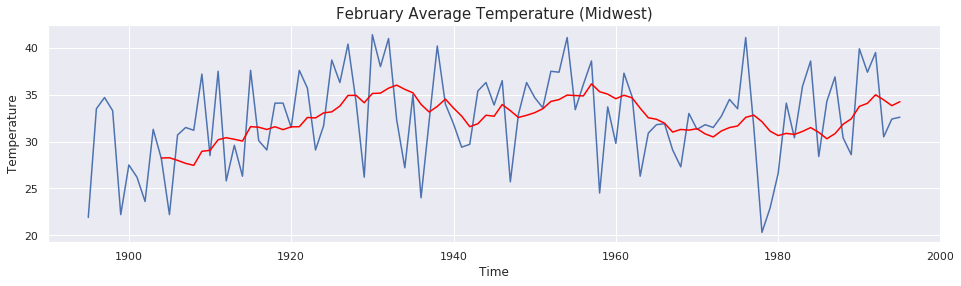

In [6]:
#Assign variables
x= df['Year']
y= df['February Average Temperature (Midwest)']

#Apply moving average
moving_avg = y.rolling(10).mean()

#For every line you want to display, a single plot command is necessary
plt.plot(x, y)
plt.plot(x, moving_avg, color = 'red')

#Change labels and title
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('February Average Temperature (Midwest)', fontsize=(15))

Text(0.5, 1.0, 'February Average temperature in different state')

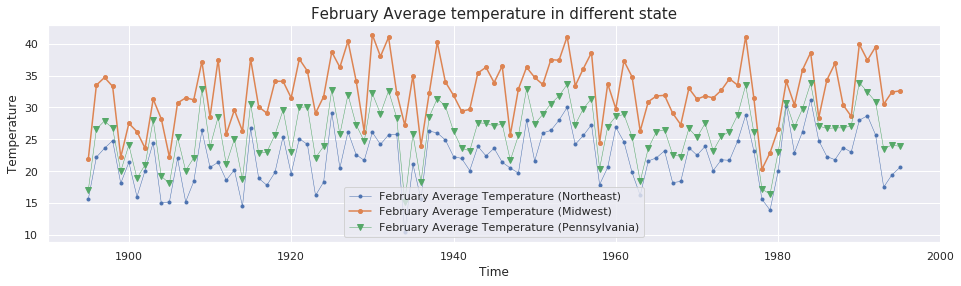

In [7]:
#Here we use the 
fig, ax = plt.subplots()

x= df['Year']
y1= df['February Average Temperature (Northeast)']
y2=df['February Average Temperature (Midwest)']
y3= df['February Average Temperature (Pennsylvania)']
#y4=df['February Average Temperature (Midwest)']

#As we have defined only one axis (ax) everything is plotted on this axis. 
ax.plot(x, y1, marker='.', linestyle='-', linewidth=0.5, label='February Average Temperature (Northeast)')

ax.plot(x, y2, marker='o', markersize=4, linestyle='-', label='February Average Temperature (Midwest)')

ax.plot(x, y3, marker='v', linestyle='-', linewidth=0.5, label='February Average Temperature (Pennsylvania)')

#ax.plot(x, y2, marker='o', markersize=4, linestyle='-', label='February Average Temperature (Midwest)')

#In the end we give the command to plot, the way we set our conditions.
ax.plot()

#We insert a legend 
ax.legend()

#Labels and title
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('February Average temperature in different state', fontsize=(15))

Text(0.5, 1.0, 'Accumulation seaside vs. inland')

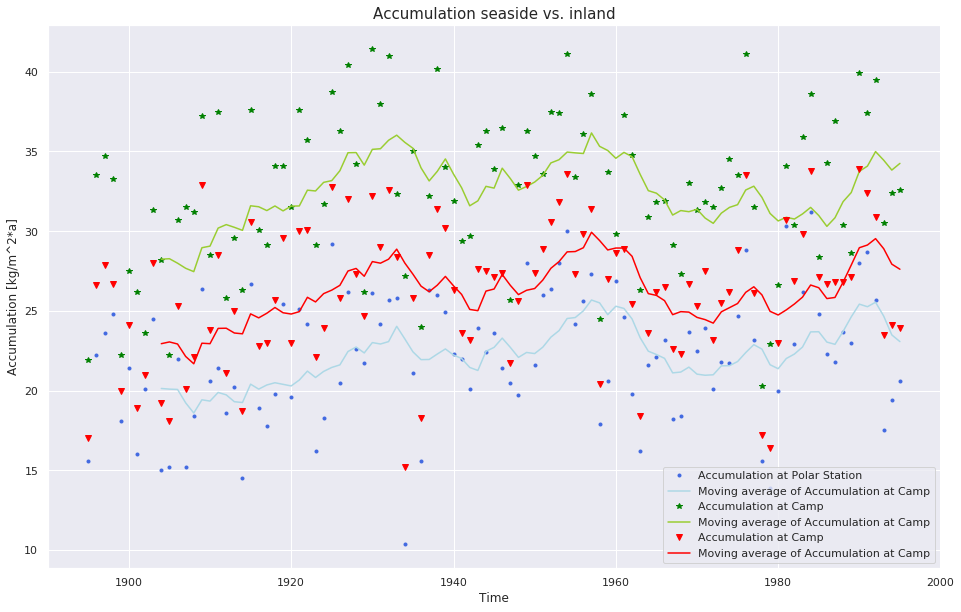

In [8]:
# Now we want to display the differences in accumulation using the accumulation records and applying the rolling mean
sns.set(rc={'figure.figsize':(16, 10)})
x = df['Year']
y1= df['February Average Temperature (Northeast)']
y2=df['February Average Temperature (Midwest)']
y3= df['February Average Temperature (Pennsylvania)']
moving_average1= y1.rolling(10).mean()
moving_average2= y2.rolling(10).mean()
moving_average3= y3.rolling(10).mean()

#Definition of the subplots
fig, ax = plt.subplots()

#Accumulation at Polar station
ax.plot(x, y1, marker='.', markersize=6, color='royalblue',linestyle='None', label='Accumulation at Polar Station')
ax.plot(x, moving_average1, linewidth=1.5, color='lightblue', label='Moving average of Accumulation at Camp')

#Accumulation at Camp
ax.plot(x, y2, marker='*', markersize=6, color='green', linestyle='None', label='Accumulation at Camp')
ax.plot(x, moving_average2, linewidth=1.5, color='yellowgreen', label='Moving average of Accumulation at Camp')

#Accumulation at Camp
ax.plot(x, y3, marker='v', markersize=6, color='red', linestyle='None', label='Accumulation at Camp')
ax.plot(x, moving_average3, linewidth=1.5, color='red', label='Moving average of Accumulation at Camp')

#Set legend, labels and title
ax.legend()
ax.set_xlabel('Time')
ax.set_ylabel('Accumulation [kg/m^2*a]')
ax.set_title('Accumulation seaside vs. inland', fontsize=(15))

Text(0, 0.5, 'Temperature')

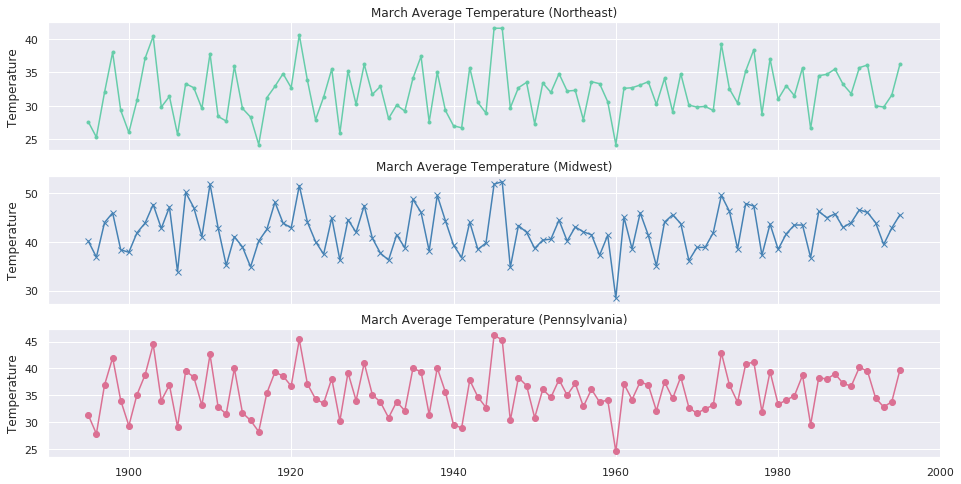

In [9]:
#Assigning the variables
x= df['Year']
y1=df['March Average Temperature (Northeast)']
y2=df['March Average Temperature (Midwest)']
y3=df['March Average Temperature (Pennsylvania)']

#Now we use 3 axes (ax, ax1, ax2) and we define the settings for the axes block by block
fig, (ax, ax1, ax2) = plt.subplots(3, 1, sharex=True, figsize=(16,8))

#Change color, linestyle, linewidth, markerstyle and transparency (alpha)
ax.plot(x, y1, color='mediumaquamarine', marker='.', alpha=1, linestyle='-')
#Change title and fontsize
ax.set_title('March Average Temperature (Northeast)', fontsize=(12))
ax.set_ylabel('Temperature')

#Second plot
ax1.plot(x, y2, color='steelblue', marker='x', alpha=1, linestyle='-')
ax1.set_title('March Average Temperature (Midwest)', fontsize=(12))
ax1.set_ylabel('Temperature')

#Third plot
ax2.plot(x, y3, color='palevioletred', marker='o', alpha=1, linestyle='-')
ax2.set_title('March Average Temperature (Pennsylvania)', fontsize=(12))
ax2.set_ylabel('Temperature')